## Business Objective: 

### Boost efficiency of marketing campaign. Predict who will respond to a product or service.

#### Load required packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Load, View and get a high level understanding of the given data to pandas dataframe

In [81]:
campaign = pd.read_csv('marketing_campaign.csv', sep=';')

###### Observation:
The input data is separated by ';' instead of ',' hence 'sep' parameter has to be given explicitly to read the data correctly within respective columns

In [82]:
# View the data
campaign.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [83]:
# Check the quantum of data
campaign.shape

(2240, 29)

In [84]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [85]:
campaign.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

###### Observation:
Atleast 50% of the customers do not have kids or teens at home

Atleast 75% of the customers have not accepted the offers in the 5 campaigns held earlier

'Z_CostContact' and 'Z_Revenue' have same values throughout the dataset and hence add no value to our analysis

In [86]:
campaign.Education.value_counts()

Graduation    1124
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [87]:
campaign.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

###### Observation:

2240 observations on the customer shopping behavior and response during previous 5 campaigns has been provided with help of 29 features

Date fields cannot be used in model building, hence we can extract possible information from the given data

Few features like AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 hold binary values.

Around 50% (1124 out of 2240) customers are Graduates

Missing values observed in Education and Income field. Post analysis we have to impute the appropriate value.

#### Missing Value Treatment

In [88]:
campaign.isnull().sum()

ID                      0
Year_Birth              0
Education               3
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [89]:
campaign.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:xlabel='Income'>

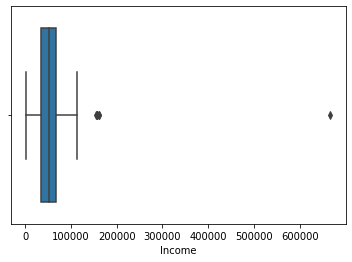

In [90]:
sns.boxplot(x='Income', data=campaign)

In [91]:
campaign.Income.fillna(campaign.Income.median(), inplace=True)

In [92]:
campaign[campaign['Income'] == 666666]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  2013-06-02       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]

In [93]:
cmp_grp_edu = campaign.groupby('Education')['Income'].median()
cmp_grp_edu

Education
2n Cycle      46891.0
Basic         20744.0
Graduation    51708.5
Master        51044.5
PhD           55005.0
Name: Income, dtype: float64

In [94]:
cmp_grp_edu[cmp_grp_edu.index == 'Graduation'].values[0]

51708.5

In [95]:
median_Income = cmp_grp_edu[cmp_grp_edu.index == 'Graduation'].values[0]

In [96]:
campaign['Income'] = np.where(campaign['Income'] == 666666, median_Income, campaign['Income'])

In [97]:
campaign.Education.value_counts()

Graduation    1124
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [98]:
mode_Education = campaign.Education.mode()[0]
campaign['Education'].replace(np.nan,mode_Education, inplace=True)

In [99]:
campaign.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Feature Enginerring

'Year_Birth' is a date field and cannot be used as input to model. Hence, lets extract the age of the customer using this field. (Assumption: Valid customer till date)

'DtCustomer' is the date customer enrolled with the company. Hence, from this date lets find number of years the customer is enrolled with the company as 'NumYrsEnrol'

AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 provides information about a customer's offer acceptance in the 1st, 2nd, 3rd, 4th and 5th campaign. We can derive a feature 'AvgCmpAcpt' which will corerspond to average offer acceptance of the customer and will help us understand overall customer acceptance acorss the 5 campaigns

In [100]:
from datetime import date, datetime

In [101]:
today = date.today()
campaign['Age'] = today.year - campaign.Year_Birth

In [102]:
campaign['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

###### Observation:

Max age 129 which is a rare possibility and may be bad data. Let us check records which have Age > 80 and rectify the same

In [103]:
campaign[campaign['Age'] > 80]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192    7829        1900  2n Cycle       Divorced  36640.0        1         0   
239   11004        1893  2n Cycle         Single  60182.0        0         1   
339    1150        1899       PhD       Together  83532.0        0         0   
424    6932        1941       PhD        Married  93027.0        0         0   
1950   6663        1940       PhD         Single  51141.0        0         0   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
192   2013-09-26       99        15  ...             0             0   
239   2014-05-17       23         8  ...             0             0   
339   2013-09-26       36       755  ...             0             0   
424   2013-04-13       77      1285  ...             0             0   
1950  2013-07-08       96       144  ...             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192              0             0             0         1              3   
239              0             0             0         0              3   
339              1             0             0         0              3   
424              1             0             0         0              3   
1950             0             0             0         0              3   

      Z_Revenue  Response  Age  
192          11         0  122  
239          11         0  129  
339          11         0  123  
424          11         0   81  
1950         11         0   82  

[5 rows x 30 columns]

In [104]:
median_Age = campaign.Age.median()
median_Age

52.0

In [105]:
campaign['Age'] = np.where(campaign['Age'] > 80, median_Age, campaign['Age'])

In [106]:
campaign['Age'].describe()

count    2240.000000
mean       53.070536
std        11.663299
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        79.000000
Name: Age, dtype: float64

###### Note:

From above description we see that the statistics of Age feature is almost the same as before and there is no major change in the data post imputation

In [107]:
campaign['Dt_Customer'] = pd.to_datetime(campaign['Dt_Customer']) 

In [108]:
campaign['NumYrsEnrol'] = (datetime.now() - campaign.Dt_Customer)
# Convert to a timedelta with a yearly precision. To extract the integer value of Year divide it with a timedelta of 1 year
campaign['NumYrsEnrol']=campaign['NumYrsEnrol']/np.timedelta64(1,'Y') 

In [109]:
campaign['NumYrsEnrol'].describe()

count    2240.000000
mean        8.923302
std         0.553393
min         7.955227
25%         8.450103
50%         8.928553
75%         9.403580
max         9.869024
Name: NumYrsEnrol, dtype: float64

In [110]:
campaign['NumYrsEnrol'].head()

0    9.770459
1    8.264610
2    8.809454
3    8.335796
4    8.396030
Name: NumYrsEnrol, dtype: float64

In [111]:
campaign['AvgCmpAcpt'] = (campaign['AcceptedCmp1'] + campaign['AcceptedCmp2'] +campaign['AcceptedCmp3'] +
                          campaign['AcceptedCmp4'] + campaign['AcceptedCmp5'])/5

In [112]:
campaign['AvgCmpAcpt'].describe()

count    2240.000000
mean        0.059554
std         0.135676
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.800000
Name: AvgCmpAcpt, dtype: float64

##### Observation:

Average Customers age is around 53 years with youngest customer around 26 years of age

The customers are enrolled with the company from 7.6 to 9.5 years with average enrollment duration being 8.5 years

From the AvgCmpAcpt feature we find that atleast 75% of the customers have not accepated the offer in any of the campaigns. Maximum accepatnce by a customer is in 4 out of 5 campaigns hence the maximum average is 0.8

#### Feature Selection & Cleanup before EDA

Drop the unwanted columns (ID, Year_Birth, Dt_Customer, Z_CostContact, Z_Revenue)

We will retain AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 fields for now to perform the EDA. However, these fields or the derived field may have to be dropped before proceeding with building the model

Drop duplicate records if any

In [113]:
campaign.drop(['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [114]:
campaign.duplicated().sum()

182

In [115]:
campaign.drop_duplicates(inplace = True)

In [116]:
campaign.shape

(2058, 27)

Lets identify the numeric and categorical fields from our dataset and change the datatype accordingly for EDA

In [117]:
campaign.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'NumYrsEnrol', 'AvgCmpAcpt'],
      dtype='object')

In [118]:
cat = campaign.select_dtypes(include='object').columns
cat

Index(['Education', 'Marital_Status'], dtype='object')

In [119]:
num = campaign.select_dtypes(exclude='object').columns
num

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'NumYrsEnrol',
       'AvgCmpAcpt'],
      dtype='object')

##### Observation:

Though 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response' are identified as numeric features, we know that these hold binary values

### Exploratory Data Analysis (EDA)

In [120]:
campaign.Response.value_counts(normalize=True)

0    0.847911
1    0.152089
Name: Response, dtype: float64

##### Observation

The 'Response' variable is the dependent field which is the field we would predict using the given data. It is obsrved that there is an imbalance in the data. Only 15% of the customers have given a poistive response.

In [121]:
campaign[num].describe().T

count          mean           std          min  \
Income               2058.0  52047.593052  21458.775570  1730.000000   
Kidhome              2058.0      0.445578      0.537556     0.000000   
Teenhome             2058.0      0.509232      0.546489     0.000000   
Recency              2058.0     48.951895     28.999189     0.000000   
MntWines             2058.0    303.921769    336.528217     0.000000   
MntFruits            2058.0     26.234694     39.750728     0.000000   
MntMeatProducts      2058.0    167.704568    228.303238     0.000000   
MntFishProducts      2058.0     37.329446     54.657215     0.000000   
MntSweetProducts     2058.0     27.176871     41.714004     0.000000   
MntGoldProds         2058.0     43.873178     52.126598     0.000000   
NumDealsPurchases    2058.0      2.339164      1.942947     0.000000   
NumWebPurchases      2058.0      4.098639      2.797577     0.000000   
NumCatalogPurchases  2058.0      2.660836      2.933824     0.000000   
NumStorePurchases    2058.0      5.770651      3.239113     0.000000   
NumWebVisitsMonth    2058.0      5.319728      2.439907     0.000000   
AcceptedCmp3         2058.0      0.073372      0.260810     0.000000   
AcceptedCmp4         2058.0      0.076774      0.266297     0.000000   
AcceptedCmp5         2058.0      0.071914      0.258409     0.000000   
AcceptedCmp1         2058.0      0.065598      0.247638     0.000000   
AcceptedCmp2         2058.0      0.012634      0.111714     0.000000   
Complain             2058.0      0.009718      0.098124     0.000000   
Response             2058.0      0.152089      0.359195     0.000000   
Age                  2058.0     53.078231     11.624167    26.000000   
NumYrsEnrol          2058.0      8.920243      0.553507     7.955227   
AvgCmpAcpt           2058.0      0.060058      0.135661     0.000000   

                              25%          50%           75%            max  
Income               35701.750000  51381.50000  68146.500000  162397.000000  
Kidhome                  0.000000      0.00000      1.000000       2.000000  
Teenhome                 0.000000      0.00000      1.000000       2.000000  
Recency                 24.000000     49.00000     74.000000      99.000000  
MntWines                23.000000    174.00000    504.000000    1493.000000  
MntFruits                1.000000      8.00000     33.000000     199.000000  
MntMeatProducts         16.000000     67.00000    229.500000    1725.000000  
MntFishProducts          3.000000     12.00000     50.000000     259.000000  
MntSweetProducts         1.000000      8.00000     33.750000     263.000000  
MntGoldProds             9.000000     24.00000     56.000000     362.000000  
NumDealsPurchases        1.000000      2.00000      3.000000      15.000000  
NumWebPurchases          2.000000      4.00000      6.000000      27.000000  
NumCatalogPurchases      0.000000      2.00000      4.000000      28.000000  
NumStorePurchases        3.000000      5.00000      8.000000      13.000000  
NumWebVisitsMonth        3.000000      6.00000      7.000000      20.000000  
AcceptedCmp3             0.000000      0.00000      0.000000       1.000000  
AcceptedCmp4             0.000000      0.00000      0.000000       1.000000  
AcceptedCmp5             0.000000      0.00000      0.000000       1.000000  
AcceptedCmp1             0.000000      0.00000      0.000000       1.000000  
AcceptedCmp2             0.000000      0.00000      0.000000       1.000000  
Complain                 0.000000      0.00000      0.000000       1.000000  
Response                 0.000000      0.00000      0.000000       1.000000  
Age                     45.000000     52.00000     63.000000      79.000000  
NumYrsEnrol              8.445312      8.91897      9.400842       9.869024  
AvgCmpAcpt               0.000000      0.00000      0.000000       0.800000

##### Observations

Features related to amount spent on Wines, Fruits, Meat, Fish, Sweet, Gold are skewed as the mean and median value are not near each other and the standard deviation for these feids is also high

If we compare the features related to number of purchases, on an average purchases made directly in the stores is highest

On an average customers visit the company website 5-6 times a month

#### Univariate Analysis Numeric Features

In [122]:
campaign.Age.describe()

count    2058.000000
mean       53.078231
std        11.624167
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        79.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

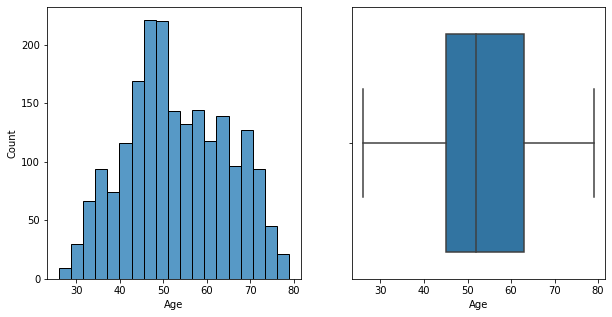

In [123]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 
sns.histplot(x='Age',data=campaign, ax=axs[0]) 
sns.boxplot(x= 'Age', data=campaign, ax=axs[1]) 

In [124]:
campaign.Income.describe()

count      2058.000000
mean      52047.593052
std       21458.775570
min        1730.000000
25%       35701.750000
50%       51381.500000
75%       68146.500000
max      162397.000000
Name: Income, dtype: float64

<AxesSubplot:xlabel='Income'>

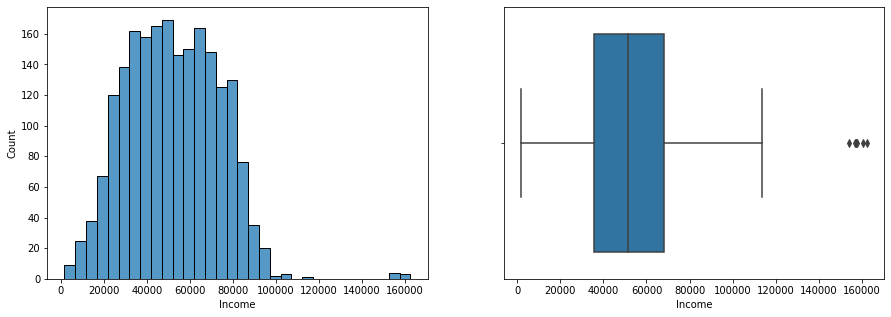

In [125]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) 
sns.histplot(x='Income', data= campaign, ax=axs[0]) 
sns.boxplot(x= 'Income', data=campaign, ax=axs[1]) 

In [126]:
campaign.Recency.describe()

count    2058.000000
mean       48.951895
std        28.999189
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Recency'>

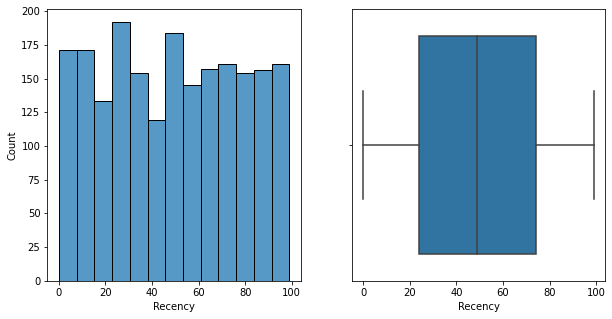

In [127]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(x='Recency',data=campaign, ax=axs[0]) 
sns.boxplot(x= 'Recency', data=campaign, ax=axs[1])

In [128]:
campaign.MntWines.describe()

count    2058.000000
mean      303.921769
std       336.528217
min         0.000000
25%        23.000000
50%       174.000000
75%       504.000000
max      1493.000000
Name: MntWines, dtype: float64

<AxesSubplot:xlabel='MntWines'>

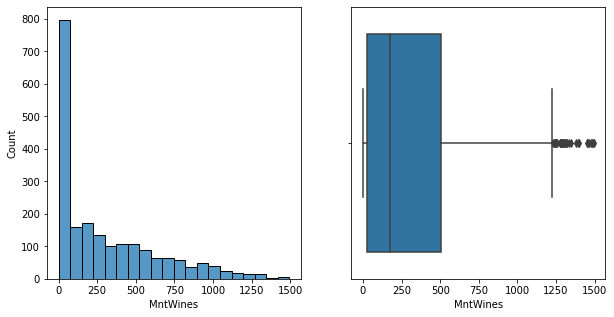

In [129]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(x= 'MntWines',data=campaign, ax=axs[0])
sns.boxplot(x= 'MntWines', data=campaign, ax=axs[1]) 

In [130]:
campaign.MntGoldProds.describe()

count    2058.000000
mean       43.873178
std        52.126598
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64

<AxesSubplot:xlabel='MntGoldProds'>

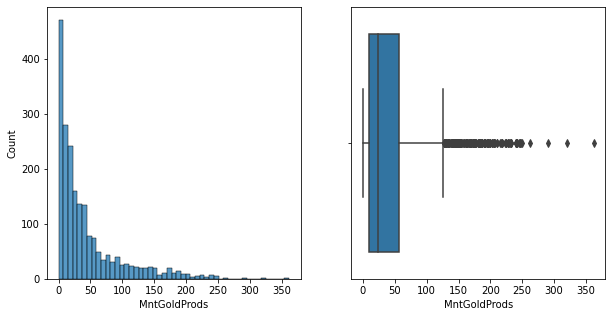

In [131]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 
sns.histplot(x= 'MntGoldProds', data = campaign, ax=axs[0]) 
sns.boxplot(x= 'MntGoldProds', data=campaign, ax=axs[1]) 

In [132]:
campaign.Complain.value_counts()

0    2038
1      20
Name: Complain, dtype: int64

<AxesSubplot:xlabel='Complain', ylabel='count'>

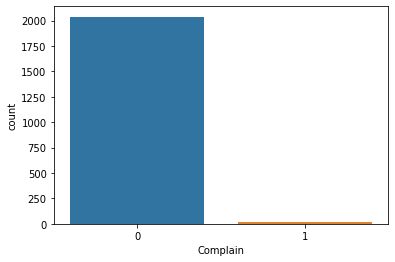

In [133]:
sns.countplot(x='Complain', data=campaign)

In [134]:
campaign.NumDealsPurchases.value_counts()

1     881
2     459
3     276
4     179
5      85
6      58
0      42
7      34
8      14
9       7
15      7
10      5
11      5
12      3
13      3
Name: NumDealsPurchases, dtype: int64

<AxesSubplot:xlabel='count', ylabel='NumDealsPurchases'>

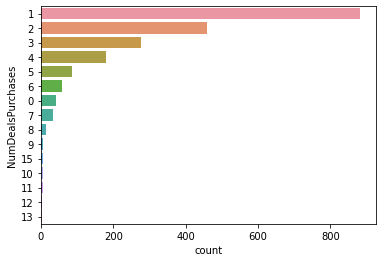

In [135]:
sns.countplot(y='NumDealsPurchases', order=campaign.NumDealsPurchases.value_counts().index,data=campaign)

<AxesSubplot:xlabel='AcceptedCmp5', ylabel='count'>

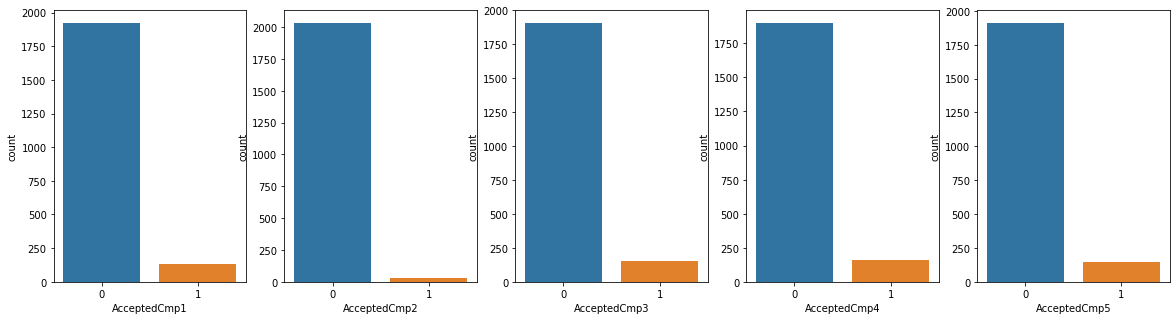

In [136]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5)) 
sns.countplot(x='AcceptedCmp1', data=campaign, ax=axs[0])
sns.countplot(x='AcceptedCmp2', data=campaign, ax=axs[1])
sns.countplot(x='AcceptedCmp3', data=campaign, ax=axs[2])
sns.countplot(x='AcceptedCmp4', data=campaign, ax=axs[3])
sns.countplot(x='AcceptedCmp5', data=campaign, ax=axs[4])

##### Observation

Age field is normally distributed with no outliers

Income field has few outliers which can be treated based on the technique to be applied for prediction

Recency (number of day since last purchase) ranges from 0 to 99 days with an average of 48-49 days

Fields related to amount spent on Gold, Wines are right skewed and have outliers

Number of purchases made with discount is a discrete numeric field and ranges from 0 to maximum of 15

Only 1% (20 out of 2058) customers have raised a complain or are having some concern

Response for the campaign 2 has been the lowest. Only 1.2% (26/2058) customers have accepted the offer.

#### Univariate Analysis Catgeorical Features

##### Define Function for univariate analysis of categorical variable

In [137]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(campaign[cat_column].value_counts())
    sns.countplot(x=cat_column, data=campaign, palette='pastel')
    plt.show()
    print("       ")

In [138]:
cat

Index(['Education', 'Marital_Status'], dtype='object')

Details of Education
----------------------------------------------------------------
Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64


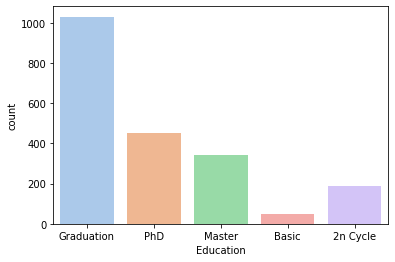

       
Details of Marital_Status
----------------------------------------------------------------
Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


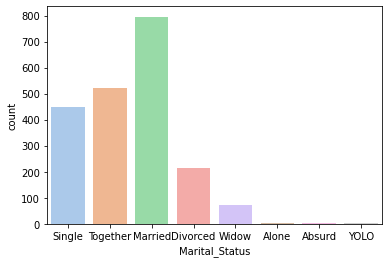

In [139]:
for x in cat:
    univariateAnalysis_category(x)

##### Observation

Education feature has 5 levels and there are only 49 customers with Basic education. There is no explanation given for type '2n Cycle'. Hence, this can be assumed as a level between Basic and Graduation.

Most of the customers are married. There are 2 levels 'Absurd' and 'YOLO' ("you only live once") which seems like bad data with 2 records each. These can be imputed with mode value or appropriate value. 

In [140]:
mode_MS = campaign.Marital_Status.mode()[0]

In [141]:
campaign['Marital_Status'] = np.where((campaign['Marital_Status'] == 'Absurd'), mode_MS, campaign['Marital_Status'])
campaign['Marital_Status'] = np.where((campaign['Marital_Status'] == 'YOLO'), 'Single', campaign['Marital_Status'])
campaign['Marital_Status'] = np.where((campaign['Marital_Status'] == 'Alone'), 'Single', campaign['Marital_Status'] )

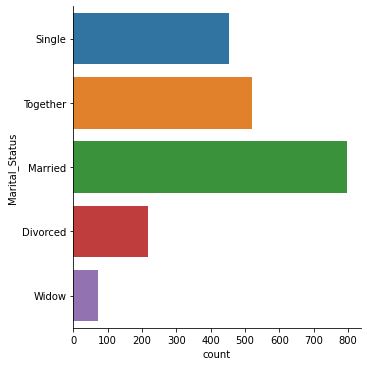

In [142]:
sns.catplot(y='Marital_Status', kind='count', data=campaign)

In [143]:
campaign['Marital_Status'].value_counts()

Married     797
Together    521
Single      453
Divorced    216
Widow        71
Name: Marital_Status, dtype: int64

### Bivariate Analysis

#### Numeric & Numeric

In [144]:
num

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'NumYrsEnrol',
       'AvgCmpAcpt'],
      dtype='object')

In [145]:
remove_num = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
 
num_list = [x for x in num if x not in remove_num]
num_list

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'NumYrsEnrol',
 'AvgCmpAcpt']

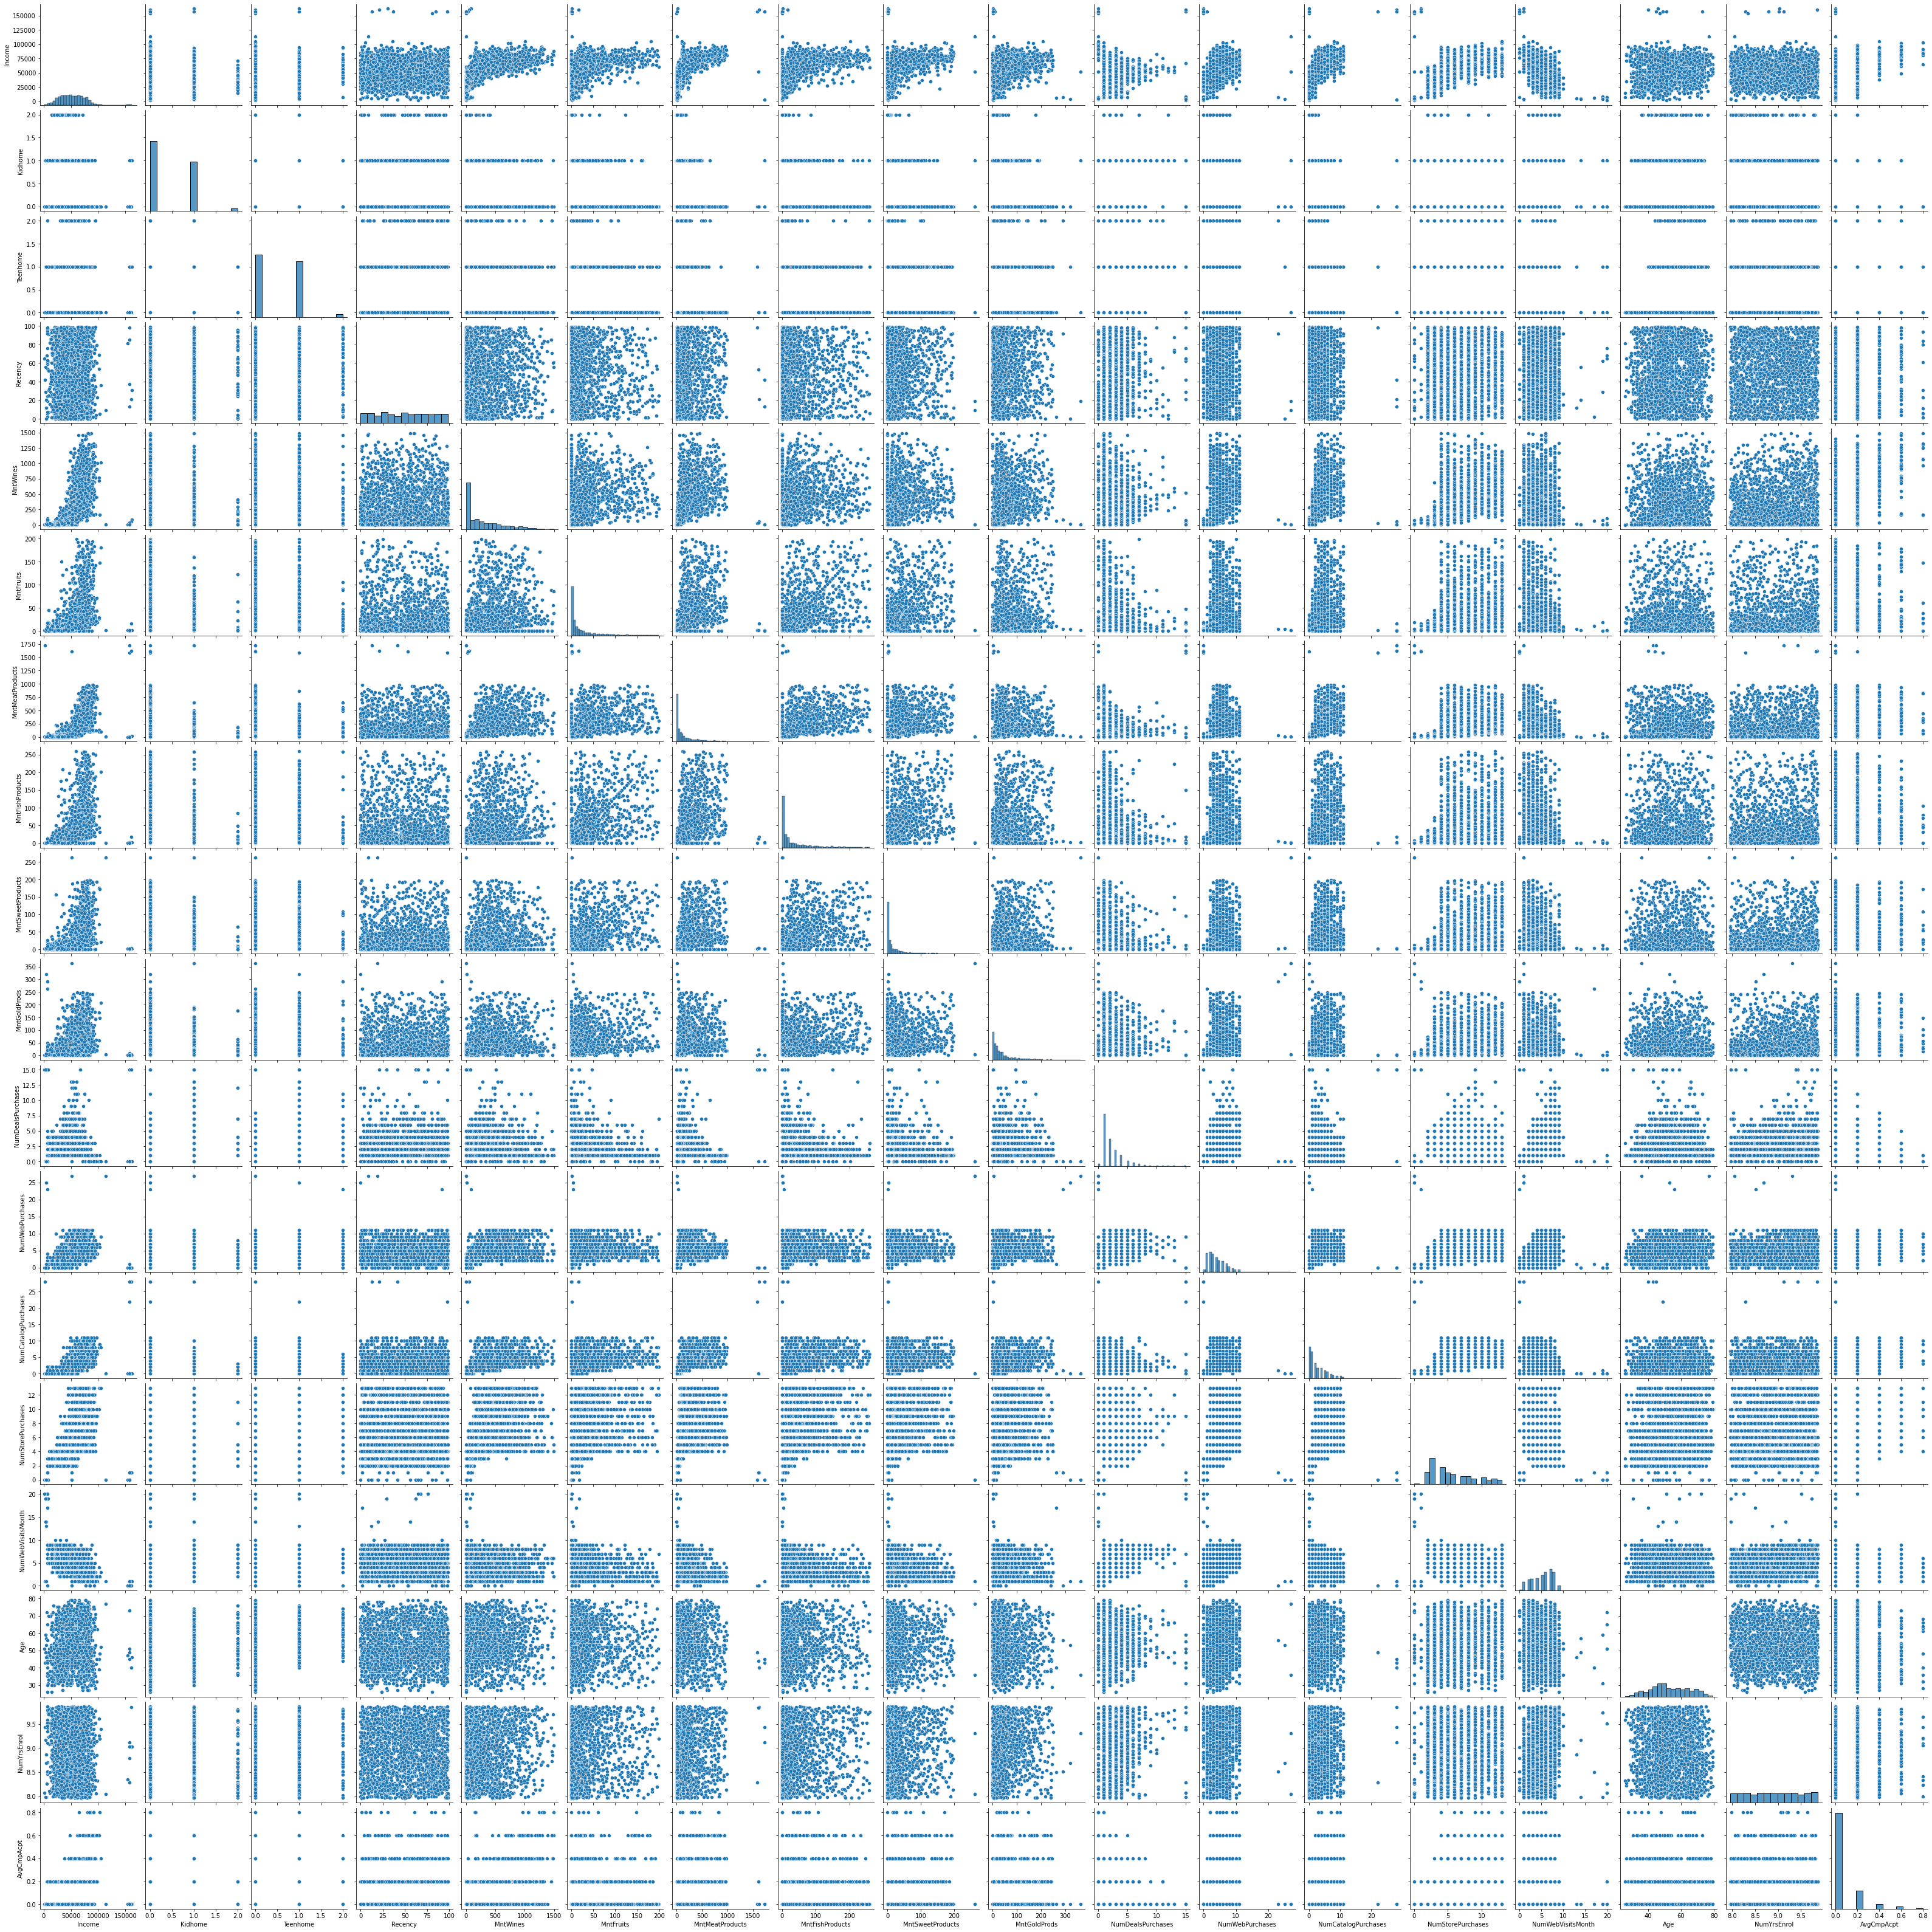

In [146]:
sns.pairplot(vars= num_list, data=campaign)

<AxesSubplot:xlabel='AvgCmpAcpt', ylabel='MntWines'>

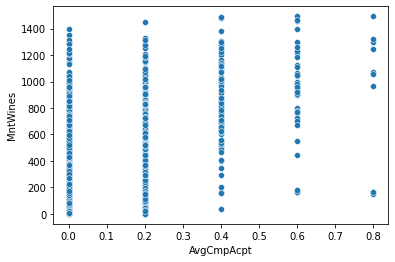

In [147]:
sns.scatterplot(x='AvgCmpAcpt', y= 'MntWines', data=campaign)

In [148]:
corr = campaign[num_list].corr()
round(corr,2)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
Income                 1.00    -0.52      0.04     0.00      0.68       0.50   
Kidhome               -0.52     1.00     -0.05     0.02     -0.50      -0.37   
Teenhome               0.04    -0.05      1.00     0.02      0.01      -0.18   
Recency                0.00     0.02      0.02     1.00      0.01      -0.01   
MntWines               0.68    -0.50      0.01     0.01      1.00       0.39   
MntFruits              0.50    -0.37     -0.18    -0.01      0.39       1.00   
MntMeatProducts        0.68    -0.44     -0.26     0.01      0.55       0.54   
MntFishProducts        0.51    -0.39     -0.20    -0.00      0.40       0.59   
MntSweetProducts       0.51    -0.37     -0.16     0.02      0.38       0.56   
MntGoldProds           0.37    -0.35     -0.02     0.01      0.39       0.40   
NumDealsPurchases     -0.11     0.21      0.38     0.01      0.01      -0.13   
NumWebPurchases        0.44    -0.37      0.15    -0.01      0.54       0.29   
NumCatalogPurchases    0.69    -0.50     -0.11     0.02      0.63       0.49   
NumStorePurchases      0.62    -0.50      0.05    -0.00      0.64       0.46   
NumWebVisitsMonth     -0.64     0.44      0.13    -0.02     -0.31      -0.41   
Age                    0.20    -0.24      0.37     0.02      0.17       0.02   
NumYrsEnrol           -0.02    -0.06      0.02     0.03      0.17       0.08   
AvgCmpAcpt             0.36    -0.22     -0.13    -0.02      0.51       0.17   

                     MntMeatProducts  MntFishProducts  MntSweetProducts  \
Income                          0.68             0.51              0.51   
Kidhome                        -0.44            -0.39             -0.37   
Teenhome                       -0.26            -0.20             -0.16   
Recency                         0.01            -0.00              0.02   
MntWines                        0.55             0.40              0.38   
MntFruits                       0.54             0.59              0.56   
MntMeatProducts                 1.00             0.56              0.52   
MntFishProducts                 0.56             1.00              0.58   
MntSweetProducts                0.52             0.58              1.00   
MntGoldProds                    0.34             0.42              0.38   
NumDealsPurchases              -0.12            -0.14             -0.12   
NumWebPurchases                 0.28             0.29              0.35   
NumCatalogPurchases             0.72             0.53              0.48   
NumStorePurchases               0.47             0.46              0.45   
NumWebVisitsMonth              -0.53            -0.44             -0.41   
Age                             0.03             0.05              0.03   
NumYrsEnrol                     0.10             0.09              0.09   
AvgCmpAcpt                      0.31             0.17              0.20   

                     MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Income                       0.37              -0.11             0.44   
Kidhome                     -0.35               0.21            -0.37   
Teenhome                    -0.02               0.38             0.15   
Recency                      0.01               0.01            -0.01   
MntWines                     0.39               0.01             0.54   
MntFruits                    0.40              -0.13             0.29   
MntMeatProducts              0.34              -0.12             0.28   
MntFishProducts              0.42              -0.14             0.29   
MntSweetProducts             0.38              -0.12             0.35   
MntGoldProds                 1.00               0.06             0.42   
NumDealsPurchases            0.06               1.00             0.22   
NumWebPurchases              0.42               0.22             1.00   
NumCatalogPurchases          0.43               0.00             0.37   
NumStorePurchases            0.37               0.06

<AxesSubplot:>

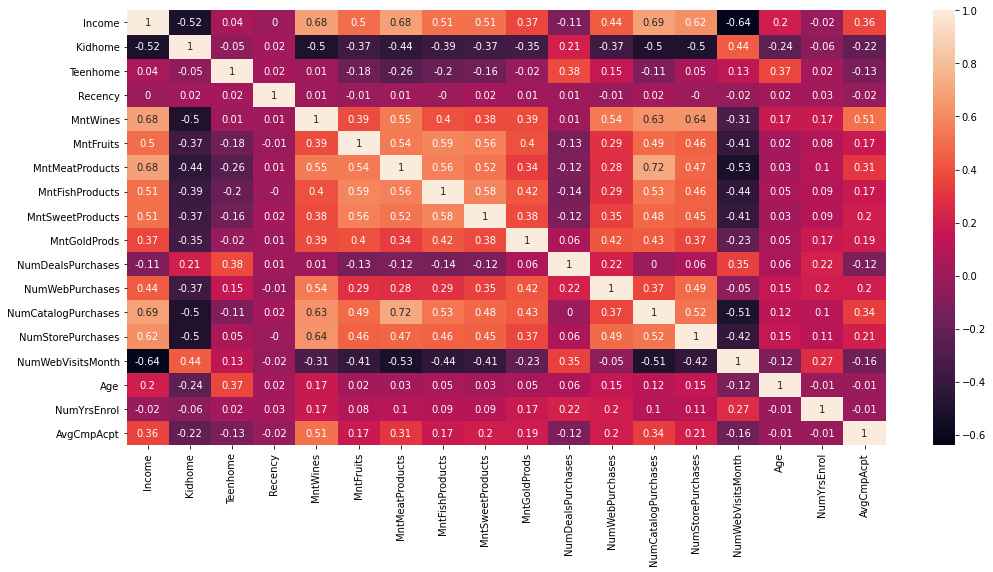

In [149]:
fig = plt.subplots(figsize=(17, 8))
sns.heatmap(round(corr,2), annot=True)

##### Observation

When the average coupon accepted is high the amount spent on wine is also high.

Correlation between the numeric fields is not very high. Only NumCatalogPurchases has a correlation of 0.72 with MntMeatProducts.

#### Categorical & Categorical

<AxesSubplot:xlabel='Education', ylabel='count'>

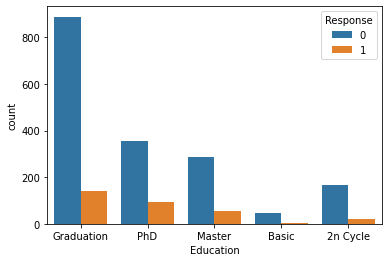

In [150]:
sns.countplot(x='Education', hue='Response', data=campaign)

<AxesSubplot:xlabel='Complain', ylabel='count'>

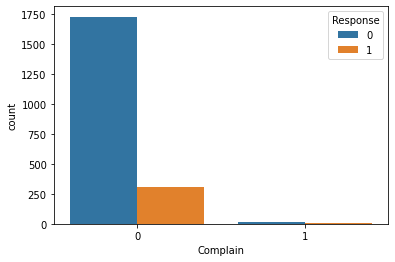

In [151]:
sns.countplot(x='Complain', hue='Response', data=campaign)

In [152]:
pd.crosstab(campaign.Response, campaign.Complain, margins=True)

Complain     0   1   All
Response                
0         1728  17  1745
1          310   3   313
All       2038  20  2058

##### Observation

Positive response to the campaign coming from the customers who are graduates, or hold masters PhD degree.

0.96% (3/313) customers of the positive responded customers have raised a complain 

#### Categorical & Numeric

<AxesSubplot:xlabel='AcceptedCmp5', ylabel='MntWines'>

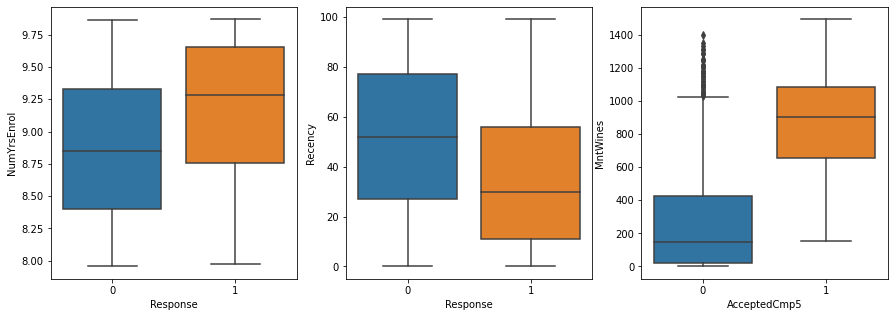

In [153]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims)
sns.boxplot(x='Response', y='NumYrsEnrol', data=campaign, ax=axs[0])
sns.boxplot(x='Response', y='Recency', data=campaign, ax=axs[1])
sns.boxplot(x='AcceptedCmp5', y='MntWines', data=campaign, ax=axs[2])

##### Observation

Median years of enrollment of the customers who have responded positively is 9 years. Higher assocation reveals positive repsonse to the campaign.

Most of the customers who have responded positively have visited the company in last 10-30 days. More recent visit, higher chances of positive response.

Amount spent on Wines by the customers who accepted the offer in camapign 5 is significantly high


### Multivariate Analysis

<AxesSubplot:xlabel='Response', ylabel='Age'>

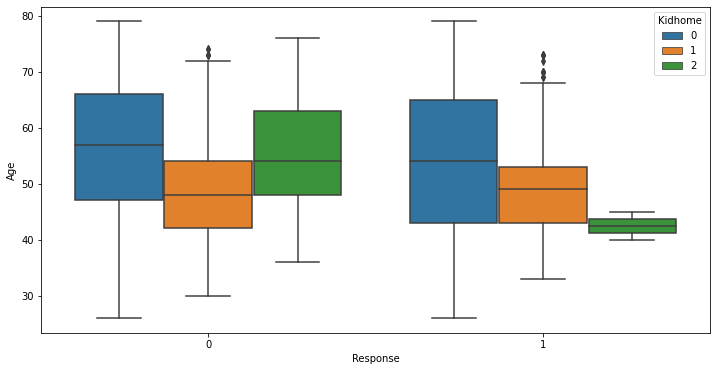

In [154]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Response', y='Age', hue='Kidhome',data=campaign)

##### Observation:

There is no major difference between the age of customers who have and have not responded to the campaign. However, there is a significant difference between the age of customers with 2 kids. Younger customers with 2 kids have responded positively compared to the older customers with 2 kids.

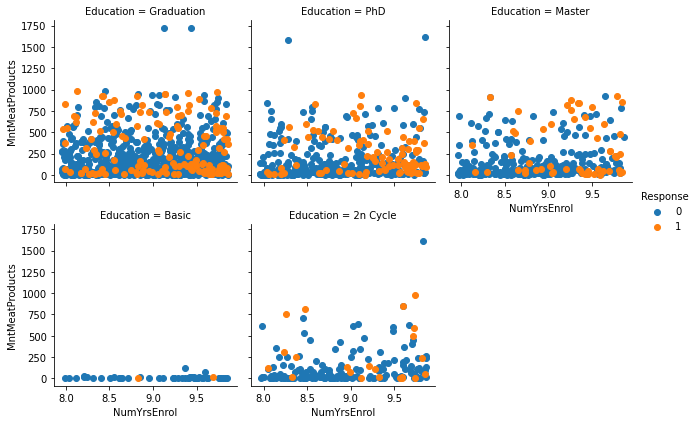

In [155]:
g = sns.FacetGrid(campaign, col="Education", hue='Response',col_wrap=3, height=3)
g = g.map(plt.scatter, "NumYrsEnrol", 'MntMeatProducts')
g.add_legend()

##### Observation

Customers with Basic education do not spend much on purchase of meat. Very few of them have responded positively to the campaign

Customers with Master or 2n Cycle education spend fairly on meat. Higher the enrollment tenure of these customers more is the positive response on the campaign.



### Summary

#### EDA helps in getting insights from Data : 

Quality : We found fields that were not relevant, missing values in few fields, bad data in few fields which had to be cleaned

Quantum of Data: We know about how many valid observations and relevant features are available to proceed with the prediction. We also understand that there is a data imbalance (only 15% of the observations correspond to poistively responding customers). This will help in understanding some of the model evaluation parameters better and give us an idea on how the performance can be improved further.

Number of features with categorical datatype, numeric datatype etc. This can be useful is choosing an apporpriate technique to build the classification model which is the next step

Frequency and distribution of the features. This will help us validate the assumptions that are made before implementing a technique

Relevance of data w,r.t the objective: Univariate, Bivariate, Multivariate analysis helps us understand if the features will indeed help in classifying the repsonse of the customers 

### Data Preparation

In [156]:
campaign.describe().T

count          mean           std          min  \
Income               2058.0  52047.593052  21458.775570  1730.000000   
Kidhome              2058.0      0.445578      0.537556     0.000000   
Teenhome             2058.0      0.509232      0.546489     0.000000   
Recency              2058.0     48.951895     28.999189     0.000000   
MntWines             2058.0    303.921769    336.528217     0.000000   
MntFruits            2058.0     26.234694     39.750728     0.000000   
MntMeatProducts      2058.0    167.704568    228.303238     0.000000   
MntFishProducts      2058.0     37.329446     54.657215     0.000000   
MntSweetProducts     2058.0     27.176871     41.714004     0.000000   
MntGoldProds         2058.0     43.873178     52.126598     0.000000   
NumDealsPurchases    2058.0      2.339164      1.942947     0.000000   
NumWebPurchases      2058.0      4.098639      2.797577     0.000000   
NumCatalogPurchases  2058.0      2.660836      2.933824     0.000000   
NumStorePurchases    2058.0      5.770651      3.239113     0.000000   
NumWebVisitsMonth    2058.0      5.319728      2.439907     0.000000   
AcceptedCmp3         2058.0      0.073372      0.260810     0.000000   
AcceptedCmp4         2058.0      0.076774      0.266297     0.000000   
AcceptedCmp5         2058.0      0.071914      0.258409     0.000000   
AcceptedCmp1         2058.0      0.065598      0.247638     0.000000   
AcceptedCmp2         2058.0      0.012634      0.111714     0.000000   
Complain             2058.0      0.009718      0.098124     0.000000   
Response             2058.0      0.152089      0.359195     0.000000   
Age                  2058.0     53.078231     11.624167    26.000000   
NumYrsEnrol          2058.0      8.920243      0.553507     7.955227   
AvgCmpAcpt           2058.0      0.060058      0.135661     0.000000   

                              25%          50%           75%            max  
Income               35701.750000  51381.50000  68146.500000  162397.000000  
Kidhome                  0.000000      0.00000      1.000000       2.000000  
Teenhome                 0.000000      0.00000      1.000000       2.000000  
Recency                 24.000000     49.00000     74.000000      99.000000  
MntWines                23.000000    174.00000    504.000000    1493.000000  
MntFruits                1.000000      8.00000     33.000000     199.000000  
MntMeatProducts         16.000000     67.00000    229.500000    1725.000000  
MntFishProducts          3.000000     12.00000     50.000000     259.000000  
MntSweetProducts         1.000000      8.00000     33.750000     263.000000  
MntGoldProds             9.000000     24.00000     56.000000     362.000000  
NumDealsPurchases        1.000000      2.00000      3.000000      15.000000  
NumWebPurchases          2.000000      4.00000      6.000000      27.000000  
NumCatalogPurchases      0.000000      2.00000      4.000000      28.000000  
NumStorePurchases        3.000000      5.00000      8.000000      13.000000  
NumWebVisitsMonth        3.000000      6.00000      7.000000      20.000000  
AcceptedCmp3             0.000000      0.00000      0.000000       1.000000  
AcceptedCmp4             0.000000      0.00000      0.000000       1.000000  
AcceptedCmp5             0.000000      0.00000      0.000000       1.000000  
AcceptedCmp1             0.000000      0.00000      0.000000       1.000000  
AcceptedCmp2             0.000000      0.00000      0.000000       1.000000  
Complain                 0.000000      0.00000      0.000000       1.000000  
Response                 0.000000      0.00000      0.000000       1.000000  
Age                     45.000000     52.00000     63.000000      79.000000  
NumYrsEnrol              8.445312      8.91897      9.400842       9.869024  
AvgCmpAcpt               0.000000      0.00000      0.000000       0.800000

In [157]:
num_list

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'NumYrsEnrol',
 'AvgCmpAcpt']

In [158]:
remove_num = ['Kidhome','Teenhome','AvgCmpAcpt']
 
num_list1 = [x for x in num_list if x not in remove_num]
num_list1

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'NumYrsEnrol']

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
slr = StandardScaler()

In [161]:
campaign.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   
3  Graduation       Together  26646.0        1         0       26        11   
4         PhD        Married  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp3  \
0         88              546              172  ...             0   
1          1                6                2  ...             0   
2         49              127              111  ...             0   
3          4               20               10  ...             0   
4         43              118               46  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

    Age  NumYrsEnrol  AvgCmpAcpt  
0  65.0     9.770459         0.0  
1  68.0     8.264610         0.0  
2  57.0     8.809454         0.0  
3  38.0     8.335796         0.0  
4  41.0     8.396030         0.0  

[5 rows x 27 columns]

In [162]:
campaign[num_list1] = slr.fit_transform(campaign[num_list1])

In [163]:
campaign.head()

Education Marital_Status    Income  Kidhome  Teenhome   Recency  MntWines  \
0  Graduation         Single  0.283888        0         0  0.312088  0.984044   
1  Graduation         Single -0.265858        1         1 -0.377754 -0.870634   
2  Graduation       Together  0.911989        0         0 -0.791659  0.362846   
3  Graduation       Together -1.184027        1         0 -0.791659 -0.870634   
4         PhD        Married  0.291113        1         0  1.553804 -0.389131   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp3  \
0   1.554193         1.657389         2.464511  ...             0   
1  -0.634978        -0.708461        -0.646539  ...             0   
2   0.572841        -0.178335         1.348193  ...             0   
3  -0.559489        -0.647124        -0.500137  ...             0   
4   0.421863        -0.217766         0.158674  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

        Age  NumYrsEnrol  AvgCmpAcpt  
0  1.025851     1.536426         0.0  
1  1.283997    -1.184795         0.0  
2  0.337463    -0.200208         0.0  
3 -1.297460    -1.056155         0.0  
4 -1.039315    -0.947307         0.0  

[5 rows x 27 columns]

In [164]:
campaign.describe().T

count          mean       std       min       25%  \
Income               2058.0  6.344132e-17  1.000243 -2.345419 -0.761917   
Kidhome              2058.0  4.455782e-01  0.537556  0.000000  0.000000   
Teenhome             2058.0  5.092323e-01  0.546489  0.000000  0.000000   
Recency              2058.0 -9.926192e-17  1.000243 -1.688454 -0.860643   
MntWines             2058.0 -4.876781e-17  1.000243 -0.903329 -0.834967   
MntFruits            2058.0 -1.726294e-17  1.000243 -0.660141 -0.634978   
MntMeatProducts      2058.0  3.797847e-17  1.000243 -0.734748 -0.664649   
MntFishProducts      2058.0 -2.589441e-17  1.000243 -0.683140 -0.628239   
MntSweetProducts     2058.0  2.891543e-17  1.000243 -0.651663 -0.627684   
MntGoldProds         2058.0  1.035777e-17  1.000243 -0.841870 -0.669172   
NumDealsPurchases    2058.0  4.833624e-17  1.000243 -1.204219 -0.689411   
NumWebPurchases      2058.0  9.321989e-17  1.000243 -1.465424 -0.750346   
NumCatalogPurchases  2058.0 -2.934700e-17  1.000243 -0.907172 -0.907172   
NumStorePurchases    2058.0 -9.839878e-17  1.000243 -1.781986 -0.855581   
NumWebVisitsMonth    2058.0 -5.869401e-17  1.000243 -2.180830 -0.950976   
AcceptedCmp3         2058.0  7.337221e-02  0.260810  0.000000  0.000000   
AcceptedCmp4         2058.0  7.677357e-02  0.266297  0.000000  0.000000   
AcceptedCmp5         2058.0  7.191448e-02  0.258409  0.000000  0.000000   
AcceptedCmp1         2058.0  6.559767e-02  0.247638  0.000000  0.000000   
AcceptedCmp2         2058.0  1.263362e-02  0.111714  0.000000  0.000000   
Complain             2058.0  9.718173e-03  0.098124  0.000000  0.000000   
Response             2058.0  1.520894e-01  0.359195  0.000000  0.000000   
Age                  2058.0 -2.934700e-16  1.000243 -2.330043 -0.695120   
NumYrsEnrol          2058.0  4.315736e-17  1.000243 -1.743882 -0.858248   
AvgCmpAcpt           2058.0  6.005831e-02  0.135661  0.000000  0.000000   

                          50%       75%       max  
Income              -0.031048  0.750407  5.143640  
Kidhome              0.000000  1.000000  2.000000  
Teenhome             0.000000  1.000000  2.000000  
Recency              0.001659  0.863962  1.726264  
MntWines            -0.386159  0.594681  3.534227  
MntFruits           -0.458838  0.170235  4.347274  
MntMeatProducts     -0.441207  0.270738  6.822829  
MntFishProducts     -0.463536  0.231875  4.056636  
MntSweetProducts    -0.459834  0.157614  5.654706  
MntGoldProds        -0.381341  0.232698  6.104449  
NumDealsPurchases   -0.174604  0.340203  6.517889  
NumWebPurchases     -0.035267  0.679811  8.188132  
NumCatalogPurchases -0.225302  0.456568  8.639006  
NumStorePurchases   -0.237978  0.688426  2.232434  
NumWebVisitsMonth    0.278878  0.688830  6.018197  
AcceptedCmp3         0.000000  0.000000  1.000000  
AcceptedCmp4         0.000000  0.000000  1.000000  
AcceptedCmp5         0.000000  0.000000  1.000000  
AcceptedCmp1         0.000000  0.000000  1.000000  
AcceptedCmp2         0.000000  0.000000  1.000000  
Complain             0.000000  0.000000  1.000000  
Response             0.000000  0.000000  1.000000  
Age                 -0.092780  0.853754  2.230531  
NumYrsEnrol         -0.002301  0.868490  1.714542  
AvgCmpAcpt           0.000000  0.000000  0.800000

In [165]:
campaign[cat].describe(include='all')

Education Marital_Status
count         2058           2058
unique           5              5
top     Graduation        Married
freq          1030            797

#### Labelencoding

In [166]:
campaign.Marital_Status.value_counts()

Married     797
Together    521
Single      453
Divorced    216
Widow        71
Name: Marital_Status, dtype: int64

In [167]:
campaign.Marital_Status = pd.Categorical(campaign.Marital_Status).codes

In [168]:
campaign.head()

Education  Marital_Status    Income  Kidhome  Teenhome   Recency  \
0  Graduation               2  0.283888        0         0  0.312088   
1  Graduation               2 -0.265858        1         1 -0.377754   
2  Graduation               3  0.911989        0         0 -0.791659   
3  Graduation               3 -1.184027        1         0 -0.791659   
4         PhD               1  0.291113        1         0  1.553804   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp3  \
0  0.984044   1.554193         1.657389         2.464511  ...             0   
1 -0.870634  -0.634978        -0.708461        -0.646539  ...             0   
2  0.362846   0.572841        -0.178335         1.348193  ...             0   
3 -0.870634  -0.559489        -0.647124        -0.500137  ...             0   
4 -0.389131   0.421863        -0.217766         0.158674  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

        Age  NumYrsEnrol  AvgCmpAcpt  
0  1.025851     1.536426         0.0  
1  1.283997    -1.184795         0.0  
2  0.337463    -0.200208         0.0  
3 -1.297460    -1.056155         0.0  
4 -1.039315    -0.947307         0.0  

[5 rows x 27 columns]

In [169]:
campaign.Marital_Status.value_counts()

1    797
3    521
2    453
0    216
4     71
Name: Marital_Status, dtype: int64

#### One Hot Encoding

In [170]:
campaign.Education.value_counts()

Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64

In [171]:
campaign = pd.get_dummies(data = campaign, prefix= 'Edu', prefix_sep='_', columns=['Education'], drop_first=True)

In [172]:
campaign.head()

Marital_Status    Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0               2  0.283888        0         0  0.312088  0.984044   1.554193   
1               2 -0.265858        1         1 -0.377754 -0.870634  -0.634978   
2               3  0.911989        0         0 -0.791659  0.362846   0.572841   
3               3 -1.184027        1         0 -0.791659 -0.870634  -0.559489   
4               1  0.291113        1         0  1.553804 -0.389131   0.421863   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0         1.657389         2.464511          1.458453  ...             0   
1        -0.708461        -0.646539         -0.627684  ...             0   
2        -0.178335         1.348193         -0.148113  ...             0   
3        -0.647124        -0.500137         -0.579727  ...             0   
4        -0.217766         0.158674         -0.004241  ...             0   

   Complain  Response       Age  NumYrsEnrol  AvgCmpAcpt  Edu_Basic  \
0         0         1  1.025851     1.536426         0.0          0   
1         0         0  1.283997    -1.184795         0.0          0   
2         0         0  0.337463    -0.200208         0.0          0   
3         0         0 -1.297460    -1.056155         0.0          0   
4         0         0 -1.039315    -0.947307         0.0          0   

   Edu_Graduation  Edu_Master  Edu_PhD  
0               1           0        0  
1               1           0        0  
2               1           0        0  
3               1           0        0  
4               0           0        1  

[5 rows x 30 columns]

In [173]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marital_Status       2058 non-null   int8   
 1   Income               2058 non-null   float64
 2   Kidhome              2058 non-null   int64  
 3   Teenhome             2058 non-null   int64  
 4   Recency              2058 non-null   float64
 5   MntWines             2058 non-null   float64
 6   MntFruits            2058 non-null   float64
 7   MntMeatProducts      2058 non-null   float64
 8   MntFishProducts      2058 non-null   float64
 9   MntSweetProducts     2058 non-null   float64
 10  MntGoldProds         2058 non-null   float64
 11  NumDealsPurchases    2058 non-null   float64
 12  NumWebPurchases      2058 non-null   float64
 13  NumCatalogPurchases  2058 non-null   float64
 14  NumStorePurchases    2058 non-null   float64
 15  NumWebVisitsMonth    2058 non-null   f

### Happy Learning